<a href="https://colab.research.google.com/github/gyyang/neurogym/blob/master/examples/example_neurogym_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train an LSTM network on the Random Dots Motion task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

You can easily change the code to train a network on any other available task or using a different algorithm (e.g. ACER, PPO2).

TODO: Make this not just usable in google colab

### Installation

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
%cd neurogym/
! pip install -e .
# Install stable-baselines
# ! git clone https://github.com/hill-a/stable-baselines.git
# ! apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
# ! cd stable-baselines/
! pip install --upgrade stable-baselines

Cloning into 'neurogym'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (538/538), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 5976 (delta 361), reused 369 (delta 209), pack-reused 5438
Receiving objects: 100% (5976/5976), 5.42 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (4286/4286), done.
/content/neurogym
Obtaining file:///content/neurogym
  Running setup.py develop for neurogym
     |████████████████████████████████| 235kB 2.5MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


### Access tasks and wrappers info

You can check all available tasks:

In [2]:
from neurogym.meta import info
import warnings
warnings.filterwarnings('ignore')
info.info();



### List of environments implemented


* 26 tasks implemented so far.


AngleReproduction-v0
AntiReach-v0
Bandit-v0
CVLearning-v0
ChangingEnvironment-v0
DawTwoStep-v0
DelayPairedAssociation-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
Detection-v0
GoNogo-v0
IntervalDiscrimination-v0
Mante-v0
MatchingPenny-v0
MotorTiming-v0
NAltPerceptualDecisionMaking-v0
PerceptualDecisionMaking-v0
PerceptualDecisionMakingDelayResponse-v0
Reaching1D-v0
Reaching1DWithSelfDistraction-v0
ReachingDelayResponse-v0
ReadySetGo-v0
Romo-v0
padoaSch-v0
PostDecisionWager-v0



Alternatively, you can check the type of tasks available by printing their properties (tags) and then filtering the list of tasks by the properties you are interesting in.

In [3]:
info.get_all_tags(verbose=1);


TAGS:

perceptual
continuous action space
delayed response
supervised
working memory
n-alternative
two-alternative
2-alternative
context dependent
go-no-go
reaction time
timing
motor
multidimensional action space
value-based
confidence


In [4]:
info.info(tags=['two-alternative', 'perceptual']);



### List of environments implemented


* 7 tasks implemented so far.


CVLearning-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
Mante-v0
PerceptualDecisionMakingDelayResponse-v0
Romo-v0



### Get information about specific task

#### Example trials ####


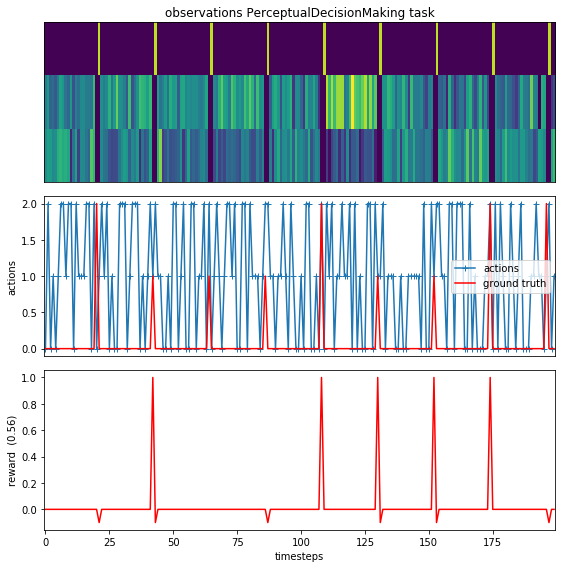

### PerceptualDecisionMaking

Logic: Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average.

Reference paper: 

[The analysis of visual motion: a comparison of
        neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Period timing (ms) 

fixation : constant 100

stimulus : constant 2000

decision : constant 100

Other parameters: 

stimEv : Controls the difficulty of the experiment. (def: 1.)

Tags: perceptual, 2-alternative, supervised.


#### Source code #### 

class PerceptualDecisionMaking(ngym.PeriodEnv):
    metadata = {
        'description': '''Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average.''',
        'paper_link': 'https://www.jneurosci.org/content/12/12/4745',
        'paper_name': '''The analysis

In [5]:
info.info('PerceptualDecisionMaking-v0', show_code=True, show_fig=True);

### Get list of available wrappers

In [6]:
info.info_wrapper();

### List of wrappers implemented


* 9 wrappers implemented so far.


CatchTrials-v0
MissTrialReward-v0
Monitor-v0
Noise-v0
PassAction-v0
PassReward-v0
ReactionTime-v0
SideBias-v0
TrialHistory-v0



### Get information about specific wrapper

In [0]:
info.info_wrapper('TrialHistory-v0', show_code=True);

### TrialHistory-v0 wrapper ###

Logic: Change ground truth probability based on previous outcome.

Reference paper: 

[Response outcomes gate the impact of expectations
         on perceptual decisions](https://www.biorxiv.org/content/10.1101/433409v3)

Input parameters: 

block_dur : Number of trials per block. (def: 200 (int))

blk_ch_prob : If not None, specifies the probability of changing
        block (randomly). (def: None)

rep_prob : Specifies probabilities of repeating for each block.
        (def: (.2, .8))


#### Source code #### 

class TrialHistory(ngym.TrialWrapper):
    metadata = {
        'description': 'Change ground truth probability ' +
        'based on previous outcome.',
        'paper_link': 'https://www.biorxiv.org/content/10.1101/433409v3',
        'paper_name': '''Response outcomes gate the impact of expectations
         on perceptual decisions''',
        'rep_prob': '''Specifies probabilities of repeating for each block.
        (def: (.2, .8))''',
     

# Example

In [0]:
import gym
import neurogym
from neurogym.wrappers import trial_hist
from neurogym.meta import info
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
warnings.filterwarnings('default')
task = 'PerceptualDecisionMaking-v0'
KWARGS = {'dt': 100, 'timing': {'fixation': ('constant', 200), 'stimulus': ('constant', 500), 'decision': ('constant', 200)}}
# Create task
env = gym.make(task, **KWARGS)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=1000000, log_interval=100000)
env.close()

---------------------------------
| explained_variance | -0.249   |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.00248  |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 325      |
| nupdates           | 100000   |
| policy_entropy     | 0.607    |
| total_timesteps    | 500000   |
| value_loss         | 0.00348  |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 323      |
| nupdates           | 200000   |
| policy_entropy     | 0.397    |
| total_timesteps    | 1000000  |
| value_loss         | 0.0173   |
---------------------------------


# Visualize results

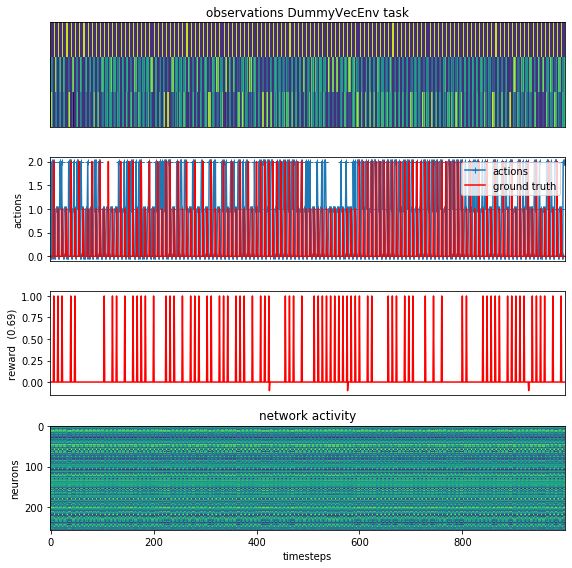

In [0]:
# Create task
env = gym.make(task, **KWARGS)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)
env = DummyVecEnv([lambda: env])
data = info.plot_env(env, num_steps_env=20000, n_stps_plt=1000,
                                model=model)
